In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import meteva.base as meb
import meteva.method as mem
import meteva.product as mpd
import numpy as np
import datetime
import copy
import matplotlib.pyplot as plt
import time
import pandas as pd
import math
import matplotlib as mpl

In [2]:
ip,port = meb.read_gds_ip_port(r"H:\test_data\input\meb\ip_port.txt")
now = datetime.datetime.now()
today = datetime.datetime(now.year,now.month,now.day,8,0)
veri_day_count =2
time1 = today - datetime.timedelta(days = veri_day_count)
tweek_ago = time1 - datetime.timedelta(days = veri_day_count)
station_alt = meb.read_station(meb.station_国家站)
station = station_alt.copy()

In [3]:
dir_ob = r"SURFACE\QC_BY_FSOL\RAIN01_ALL_STATION\YYYYMMDDHH0000.000"
ob_list = []
time2 = time1
while time2 <= now:
    path = meb.tool.path_tools.get_path(dir_ob,time2)
    sta = meb.read_stadata_from_gds(ip,port,path,station = station)
    meb.set_stadata_names(sta,["ob"])
    ob_list.append(sta)
    time2 = time2 + datetime.timedelta(hours = 1)
ob_all = pd.concat(ob_list,axis = 0)

In [4]:
#读取预报数据
dir_scmoc = r"O:\data\grid\GMOSRR\ROLLING_UPDATE\RAIN01\YYYYMMDD\YYMMDDHH.TTT.nc"
fo_list = []
time2 = tweek_ago
while time2 <= now:
    for dh in range(1,37,1):
        path = meb.tool.path_tools.get_path(dir_scmoc,time2,dh)
        grd = meb.read_griddata_from_nc(path,time = time2,dtime = dh,level = 0,data_name = "gmosrr")
        if(grd is not None):
            sta = meb.interp_gs_nearest(grd,station)
            fo_list.append(sta)
    time2 = time2 + datetime.timedelta(hours = 12)
fo_all = pd.concat(fo_list,axis = 0)

O:\data\grid\GMOSRR\ROLLING_UPDATE\RAIN01\20200413\20041308.001.nc not exists
O:\data\grid\GMOSRR\ROLLING_UPDATE\RAIN01\20200413\20041308.002.nc not exists
O:\data\grid\GMOSRR\ROLLING_UPDATE\RAIN01\20200413\20041308.003.nc not exists
O:\data\grid\GMOSRR\ROLLING_UPDATE\RAIN01\20200413\20041308.004.nc not exists
O:\data\grid\GMOSRR\ROLLING_UPDATE\RAIN01\20200413\20041308.005.nc not exists
O:\data\grid\GMOSRR\ROLLING_UPDATE\RAIN01\20200413\20041308.006.nc not exists
O:\data\grid\GMOSRR\ROLLING_UPDATE\RAIN01\20200413\20041308.007.nc not exists
O:\data\grid\GMOSRR\ROLLING_UPDATE\RAIN01\20200413\20041308.008.nc not exists
O:\data\grid\GMOSRR\ROLLING_UPDATE\RAIN01\20200413\20041308.009.nc not exists
O:\data\grid\GMOSRR\ROLLING_UPDATE\RAIN01\20200413\20041308.010.nc not exists
O:\data\grid\GMOSRR\ROLLING_UPDATE\RAIN01\20200413\20041308.011.nc not exists
O:\data\grid\GMOSRR\ROLLING_UPDATE\RAIN01\20200413\20041308.012.nc not exists
O:\data\grid\GMOSRR\ROLLING_UPDATE\RAIN01\20200413\20041308.013.

In [5]:
sta_all = meb.combine_on_obTime_id(ob_all,[fo_all],True)

In [6]:
sta_all

,level,time,dtime,id,lon,lat,ob,gmosrr
0,0.0,2020-04-15 08:00:00,1,50136,122.52,52.97,0.0,0.0
1,0.0,2020-04-15 08:00:00,1,50137,122.37,53.47,0.0,0.0
2,0.0,2020-04-15 08:00:00,1,50246,124.72,52.35,0.0,0.0
3,0.0,2020-04-15 08:00:00,1,50247,123.57,52.03,0.0,0.0
4,0.0,2020-04-15 08:00:00,1,50349,124.40,51.67,0.0,0.0
5,0.0,2020-04-15 08:00:00,1,50353,126.63,51.73,0.0,0.0
6,0.0,2020-04-15 08:00:00,1,50425,120.18,50.25,0.0,0.0
7,0.0,2020-04-15 08:00:00,1,50431,121.52,50.78,0.0,0.0
8,0.0,2020-04-15 08:00:00,1,50434,121.68,50.48,0.0,0.0
9,0.0,2020-04-15 08:00:00,1,50442,124.12,50.40,0.0,0.0


In [18]:
result = mpd.score(sta_all,mem.ets,g = "dtime",para1=[0.1,1,3])
ts = result[0]
dhour = result[1]

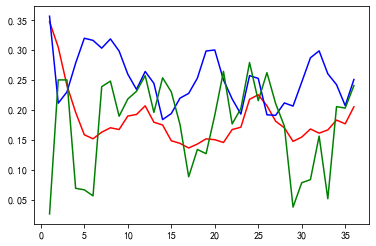

In [19]:
plt.plot(dhour,ts[:,0],"r")
plt.plot(dhour,ts[:,1],"b")
plt.plot(dhour,ts[:,2],"g")

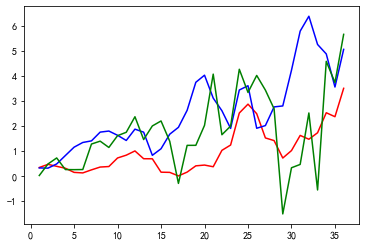

In [56]:
result = mpd.score(sta_all,mem.effective_dtime,g = "dtime",para1=[0.1,1,3])
ts = result[0]
dhour = result[1]
plt.plot(dhour,ts[:,0],"r")
plt.plot(dhour,ts[:,1],"b")
plt.plot(dhour,ts[:,2],"g")

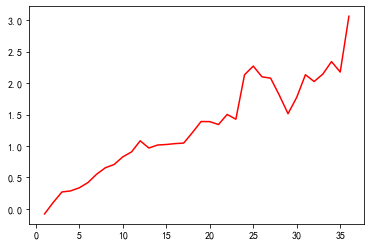

In [40]:
result = mpd.score(sta_all,mem.effective_dtime,g = "dtime",para1=[0.1,1,3])
ts = result[0]
dhour = result[1]
plt.plot(dhour,ts[:,0],"r")

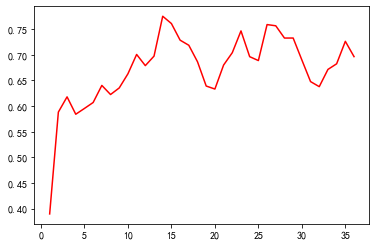

In [62]:
result = mpd.score(sta_all,mem.far,g = "dtime",para1=[0.1,1,3])
ts = result[0]
dhour = result[1]
plt.plot(dhour,ts[:,1],"r")

In [59]:
result

(array([[0.01600995, 0.00638739, 0.00033181],
        [0.04421402, 0.00564081, 0.00074658],
        [0.06976358, 0.00738283, 0.00082953],
        [0.09166321, 0.0093737 , 0.00024886],
        [0.12111157, 0.01435089, 0.00058067],
        [0.13861468, 0.01667358, 0.00058067],
        [0.14666114, 0.02306097, 0.00331813],
        [0.14417254, 0.02505185, 0.00547491],
        [0.14359187, 0.02297802, 0.00381584],
        [0.12882621, 0.02239735, 0.0038988 ],
        [0.12617171, 0.02355869, 0.00431356],
        [0.09854832, 0.01808378, 0.00290336],
        [0.10875156, 0.01617586, 0.00315222],
        [0.11530485, 0.01808378, 0.00398175],
        [0.12285359, 0.01700539, 0.00282041],
        [0.13537951, 0.01742016, 0.0026545 ],
        [0.14209871, 0.01916217, 0.00464538],
        [0.14757362, 0.01957694, 0.00290336],
        [0.1536292 , 0.02206553, 0.00290336],
        [0.15271672, 0.02397345, 0.00647034],
        [0.15114061, 0.02281211, 0.00489423],
        [0.13546246, 0.02214849, 0

In [44]:
sta_all

,level,time,dtime,id,lon,lat,ob,gmosrr
0,0.0,2020-04-15 08:00:00,1,50136,122.52,52.97,0.0,0.0
1,0.0,2020-04-15 08:00:00,1,50137,122.37,53.47,0.0,0.0
2,0.0,2020-04-15 08:00:00,1,50246,124.72,52.35,0.0,0.0
3,0.0,2020-04-15 08:00:00,1,50247,123.57,52.03,0.0,0.0
4,0.0,2020-04-15 08:00:00,1,50349,124.40,51.67,0.0,0.0
5,0.0,2020-04-15 08:00:00,1,50353,126.63,51.73,0.0,0.0
6,0.0,2020-04-15 08:00:00,1,50425,120.18,50.25,0.0,0.0
7,0.0,2020-04-15 08:00:00,1,50431,121.52,50.78,0.0,0.0
8,0.0,2020-04-15 08:00:00,1,50434,121.68,50.48,0.0,0.0
9,0.0,2020-04-15 08:00:00,1,50442,124.12,50.40,0.0,0.0
